In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


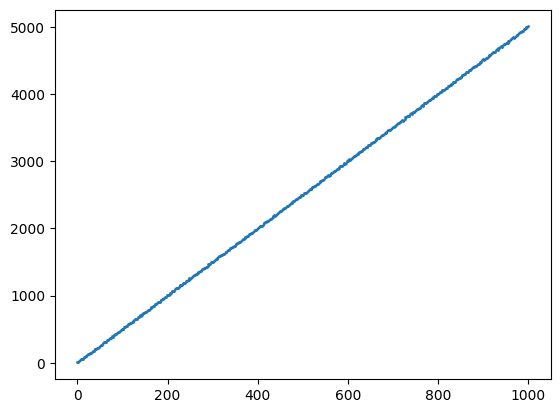

In [94]:
# Equation --> Y = 5X+4
X = np.linspace(0,1000,500) #500 value from 0 t0 1000
noise = np.random.randint(-10,10,500) #500 value as noise 
y = 5*X+4 + noise

plt.scatter(x=X,y=y,s=1)
plt.show()


Aren't steps 5 and 8 redundant???

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print('Shapes:')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
print('-'*25)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')


Shapes:
X_train: (400,)
y_train: (400,)
X_test: (100,)
y_test: (100,)
-------------------------
X_train: (400, 1)
y_train: (400, 1)
X_test: (100, 1)
y_test: (100, 1)


In [96]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=X_train,y=y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [97]:
print(f'w={model.coef_}, b={model.intercept_}')
print(f'Equation by model: Y = {model.coef_[0][0]} X + {model.intercept_[0]}')

w=[[5.00093568]], b=[3.55329738]
Equation by model: Y = 5.000935679783999 X + 3.553297381838547


In [98]:
y_train_hat = model.predict(X=X_train)
y_test_hat = model.predict(X=X_test)

# Evaluation 
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score,mean_absolute_percentage_error
print('TRAIN')
print(f'MAE: {mean_absolute_error(y_train,y_train_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_train,y_train_hat)}')
print(f'MSE: {mean_squared_error(y_train,y_train_hat)}')
print(f'RMSE: {root_mean_squared_error(y_train,y_train_hat)}')
print(f'R^2: {r2_score(y_train,y_train_hat)}')
print('-'*25)
print('TEST')
print(f'MAE: {mean_absolute_error(y_test,y_test_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test,y_test_hat)}')
print(f'MSE: {mean_squared_error(y_test,y_test_hat)}')
print(f'RMSE: {root_mean_squared_error(y_test,y_test_hat)}')
print(f'R^2: {r2_score(y_test,y_test_hat)}')

TRAIN
MAE: 4.957603311110575
MAPE: 0.006214850270445812
MSE: 32.731300096468345
RMSE: 5.721127519682492
R^2: 0.9999843202132966
-------------------------
TEST
MAE: 5.4603113402537735
MAPE: 0.0323375720660683
MSE: 38.14352935078753
RMSE: 6.176044798314495
R^2: 0.9999818698198136


##### conclusion: 
- the error in all metrics is small relative to the training data values since the training data values are in the thousands -> no underfitting
- the difference in error in all metrics between training data and test data is small -> no overfitting 

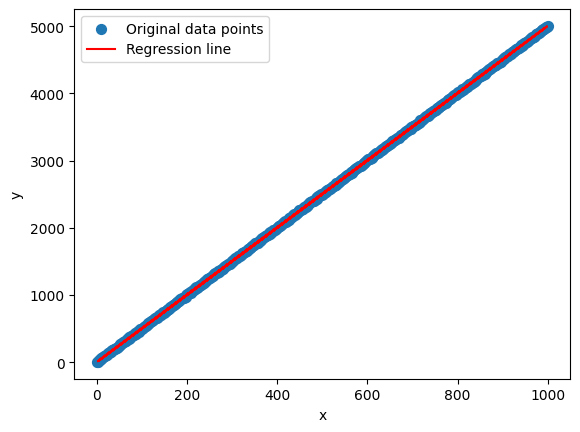

In [99]:
plt.scatter(x=X,y=y,s=50,label='Original data points')
plt.plot(X_test, y_test_hat, 'r', label="Regression line")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [100]:
# Equation --> y = 3 X1 + 7 X2 + 90
X1 = np.linspace(0,500,300)
X2 = np.linspace(50,100,300)
X = np.column_stack((X1,X2))
noise = np.random.randint(-10,10,300)
y = 3*X1 + 7*X2 + 90 + noise

In [101]:
# Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print('Shapes:')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
print('-'*25)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')



Shapes:
X_train: (240, 2)
y_train: (240,)
X_test: (60, 2)
y_test: (60,)
-------------------------
y_train: (240, 1)
y_test: (60, 1)


In [102]:
model = LinearRegression()
model.fit(X=X_train,y=y_train)

print(f'w={model.coef_}, b={model.intercept_}')
print(f'Equation by model: Y = {model.coef_[0][0]} X1 + {model.coef_[0][1]} X2 + {model.intercept_[0]}')
print('Original equation: Y = 3 X1 + 7 X2 + 90')
# Original data: y = 3 X1 + 7 X2 + 90 

w=[[3.66122457 0.36612246]], b=[422.14420771]
Equation by model: Y = 3.6612245685486533 X1 + 0.3661224568548652 X2 + 422.14420771146695
Original equation: Y = 3 X1 + 7 X2 + 90


In [103]:
y_train_hat = model.predict(X=X_train)
y_test_hat = model.predict(X=X_test)

# Evaluation 
print('TRAIN')
print(f'MAE: {mean_absolute_error(y_train,y_train_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_train,y_train_hat)}')
print(f'MSE: {mean_squared_error(y_train,y_train_hat)}')
print(f'RMSE: {root_mean_squared_error(y_train,y_train_hat)}')
print(f'R^2: {r2_score(y_train,y_train_hat)}')
print('-'*25)
print('TEST')
print(f'MAE: {mean_absolute_error(y_test,y_test_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test,y_test_hat)}')
print(f'MSE: {mean_squared_error(y_test,y_test_hat)}')
print(f'RMSE: {root_mean_squared_error(y_test,y_test_hat)}')
print(f'R^2: {r2_score(y_test,y_test_hat)}')

TRAIN
MAE: 4.7771056496157085
MAPE: 0.004220328755552655
MSE: 30.976300328188188
RMSE: 5.565635662544593
R^2: 0.9998943759367455
-------------------------
TEST
MAE: 5.16682855267726
MAPE: 0.004927663027728264
MSE: 33.074162192231235
RMSE: 5.751014014261418
R^2: 0.9998682883703337


##### conclusion: 
- the error in all metrics is small relative to the training data values (the y not X since the metric is according to the unit of the output) since the training data values are in the thousands -> no underfitting
- the difference in error in all metrics between training data and test data is small -> no overfitting 

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [104]:
# Equation --> y = 2 X^2 -3 X + 5
X = np.linspace(-10, 10, 500)
noise = np.random.randn(500)*2 #better method for noise than previous questions
y = 2*X**2 + -3 * X + 5 + noise
X = X.reshape(-1,1)

In [105]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [106]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Splitting 
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)

print('Shapes:')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
print('-'*25)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')


Shapes:
X_train: (400, 3)
y_train: (400,)
X_test: (100, 3)
y_test: (100,)
-------------------------
y_train: (400, 1)
y_test: (100, 1)


In [107]:
model = LinearRegression()
model.fit(X=X_train,y=y_train)

print(f'w={model.coef_}, b={model.intercept_}')
print(f'Equation by model: Y = {model.coef_[0][0]} 1 + {model.coef_[0][1]} X + {model.coef_[0][2]} X^2 + {model.intercept_[0]}')
print('Original equation: Y = 5 + -3 X + 2 X^2')

w=[[  0.         -17.23717059  59.87362404]], b=[72.03498868]
Equation by model: Y = 0.0 1 + -17.237170587925824 X + 59.873624042517 X^2 + 72.03498867648722
Original equation: Y = 5 + -3 X + 2 X^2


In [108]:
y_train_hat = model.predict(X=X_train)
y_test_hat = model.predict(X=X_test)

# Evaluation 
print('TRAIN')
print(f'MAE: {mean_absolute_error(y_train,y_train_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_train,y_train_hat)}')
print(f'MSE: {mean_squared_error(y_train,y_train_hat)}')
print(f'RMSE: {root_mean_squared_error(y_train,y_train_hat)}')
print(f'R^2: {r2_score(y_train,y_train_hat)}')
print('-'*25)
print('TEST')
print(f'MAE: {mean_absolute_error(y_test,y_test_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test,y_test_hat)}')
print(f'MSE: {mean_squared_error(y_test,y_test_hat)}')
print(f'RMSE: {root_mean_squared_error(y_test,y_test_hat)}')
print(f'R^2: {r2_score(y_test,y_test_hat)}')

TRAIN
MAE: 1.7149382937973865
MAPE: 0.32972681756376493
MSE: 4.6308839869329335
RMSE: 2.1519488811151937
R^2: 0.9988035425945568
-------------------------
TEST
MAE: 1.3410558103276145
MAPE: 0.2675084531366907
MSE: 3.036220977763969
RMSE: 1.7424755314677933
R^2: 0.9992293303900632


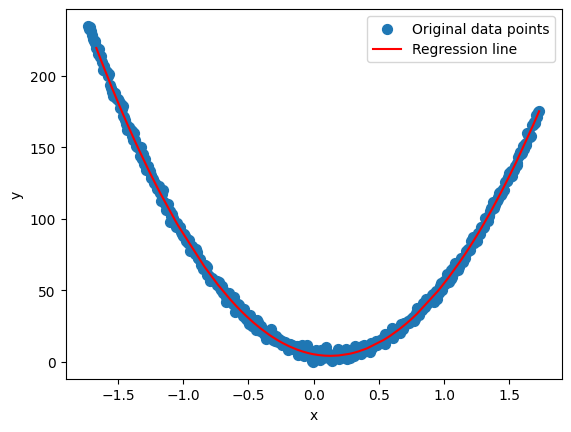

In [109]:
plt.scatter(x=X_scaled[:,1],y=y,s=50,label='Original data points')
# sort to remove scribbles inside the curve 
sorted_indices = np.argsort(X_test[:, 1])
X_test_sorted = X_test[sorted_indices]
y_test_hat_sorted = y_test_hat[sorted_indices]

plt.plot(X_test_sorted[:,1], y_test_hat_sorted, 'r', label="Regression line")
plt.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print()

##### conclusion: 
- the error in all metrics is small relative to the training data values since the training data values are in the hundreds -> no underfitting
- the difference in error in all metrics between training data and test data is small so it predicts well for both training and test-> no overfitting 

I know that the conclusion is a bit redundant for all previous models but there's no big difference between them that much

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [110]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Youss\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [111]:
os.listdir(path)

['airlines_flights_data.csv']

In [112]:
full_path = os.path.join(path,os.listdir(path)[0])

In [113]:
import pandas as pd
df = pd.read_csv(full_path)

In [114]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


### Info

In [115]:
print(df.info())
print('-'*25)
print(df.describe())
print('-'*25)
print(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
-------------------------
               index       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  30015

### Data Cleaning

In [116]:
df.drop(columns='index',inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [117]:
print(f"duplicates:{df.duplicated().sum()}")
df.drop_duplicates()
print(f"after_removing_duplicates:{df.duplicated().sum()}")

duplicates:0
after_removing_duplicates:0


In [118]:
print(df.isna().sum())
print("-"*25)
print(f"Total Null:{df.isna().sum().sum()}")

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
-------------------------
Total Null:0


### Numerical Analysis

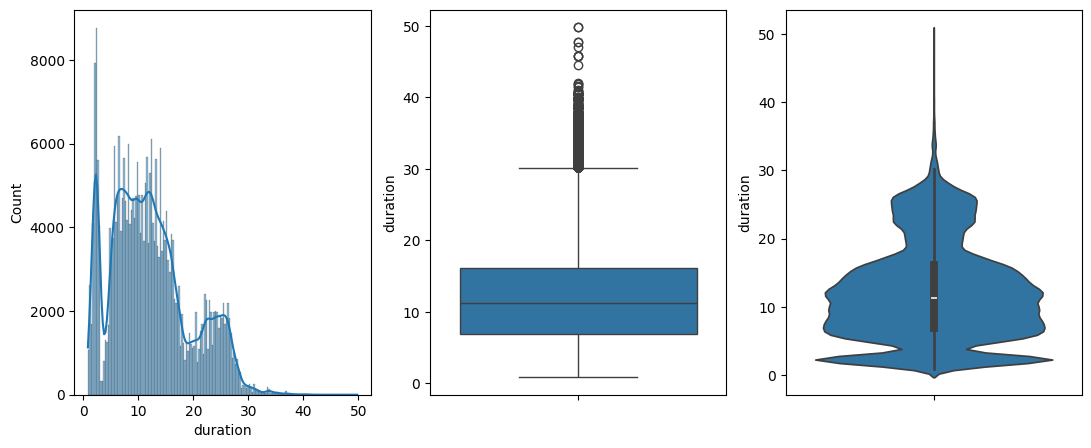

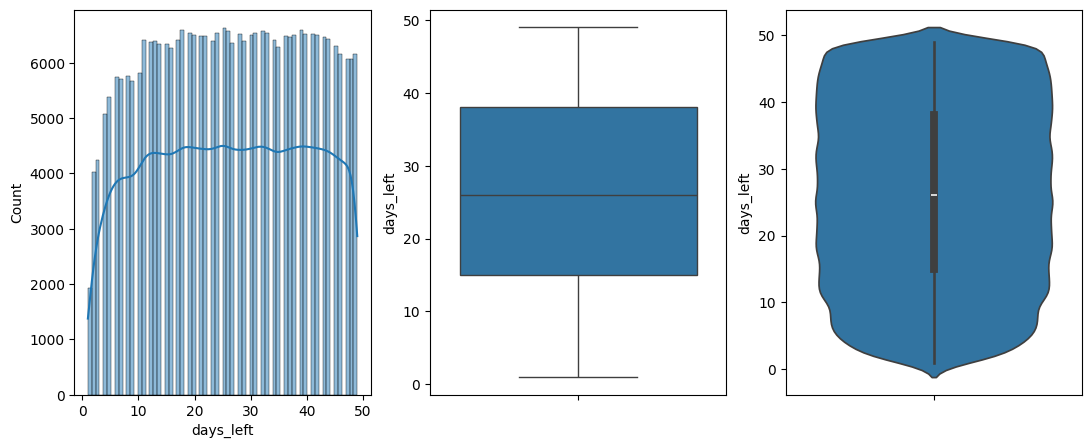

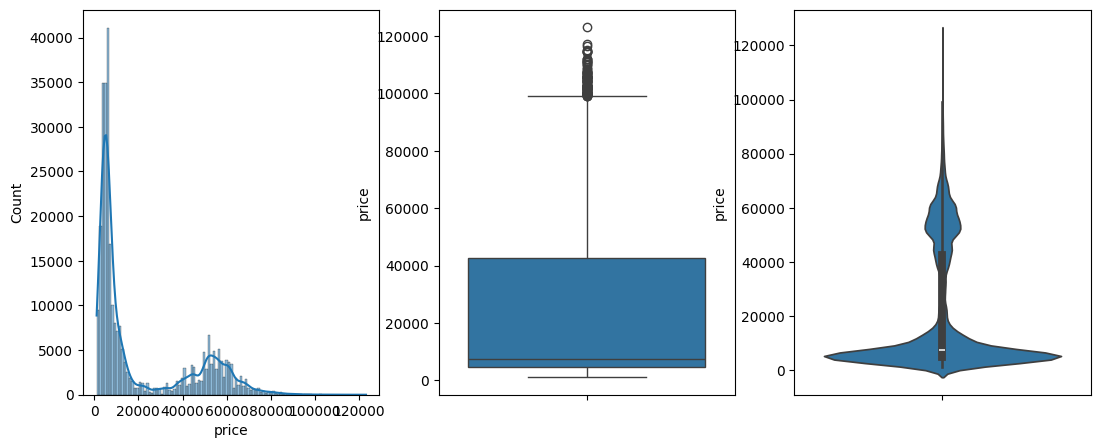

In [119]:
numerical_data = df.select_dtypes(include=['float64','int64'])
for i in numerical_data:
    plt.figure(figsize=(13,5))
    plt.subplot(1,3,1)
    sns.histplot(data=numerical_data,x=i,kde=True)
    plt.subplot(1,3,2)
    sns.boxplot(data=numerical_data,y=i)
    plt.subplot(1,3,3)
    sns.violinplot(data=numerical_data,y=i)
    plt.show()

conclusion: 
- duration: right skewed with plenty of outliers
- days_left: normal with even distribution and no outliers
- price: is right skewed with plenty of outliers

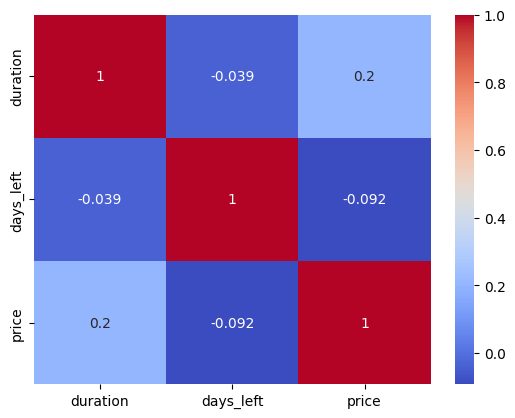

In [120]:
corr = numerical_data.corr()
sns.heatmap(data=corr,cmap='coolwarm',annot=True)
plt.show()

conclusion: there's almost no correlation between all numerical features

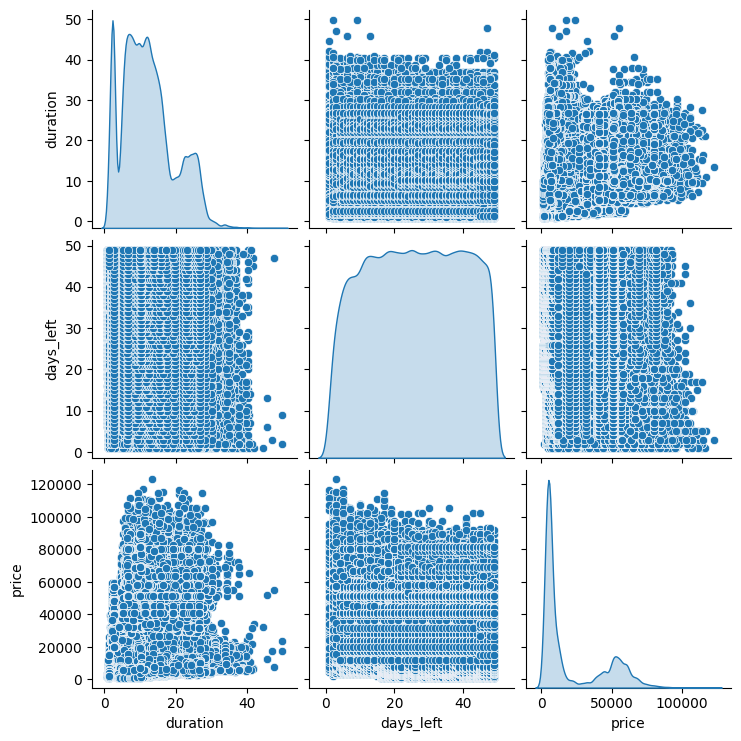

In [121]:
sns.pairplot(data=numerical_data,diag_kind='kde')
plt.show()

### Categorical Analysis

In [122]:
categorical_data = df.select_dtypes(include='object')

for c in categorical_data.columns:
    print(f"{c}:\n {categorical_data[c].unique()}, nunique: {categorical_data[c].nunique()}")
    print(categorical_data[c].value_counts())
    print("-" * 40)

airline:
 ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'], nunique: 6
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
----------------------------------------
flight:
 ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'], nunique: 1561
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64
----------------------------------------
source_city:
 ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'], nunique: 6
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
----------------------------------------
departure_time:
 ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Nigh

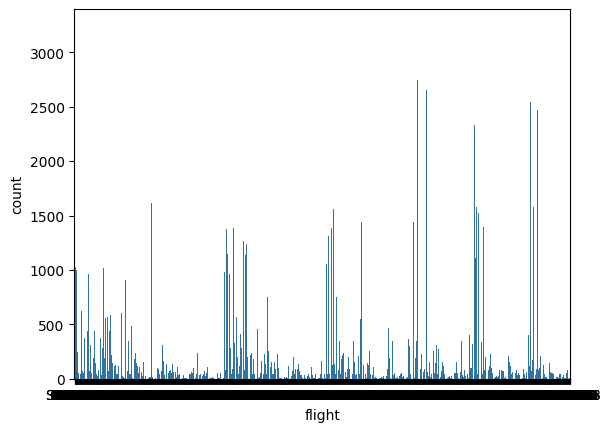

In [123]:
sns.countplot(data=categorical_data,x='flight')
plt.show()

In [124]:
df.drop(columns='flight',inplace=True)
categorical_data = df.select_dtypes(include='object')
categorical_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy


conclusion:
- will drop 'flight' as it won't help much in the model, probably will make it worse predicting the price
- all are nominal except 'stops' and 'class'

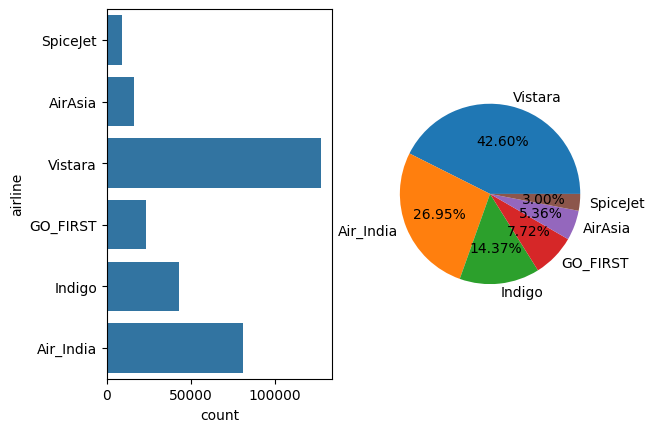

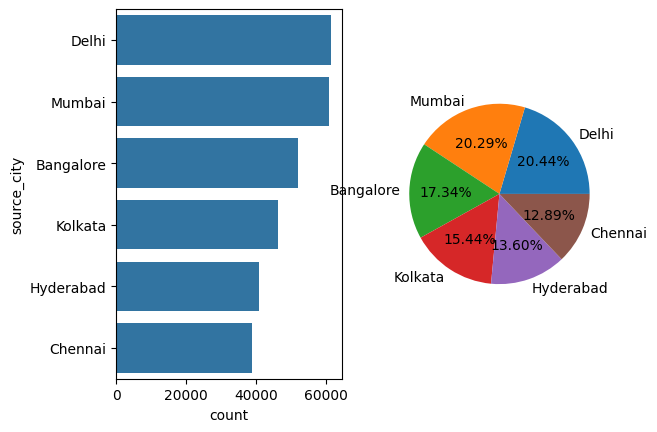

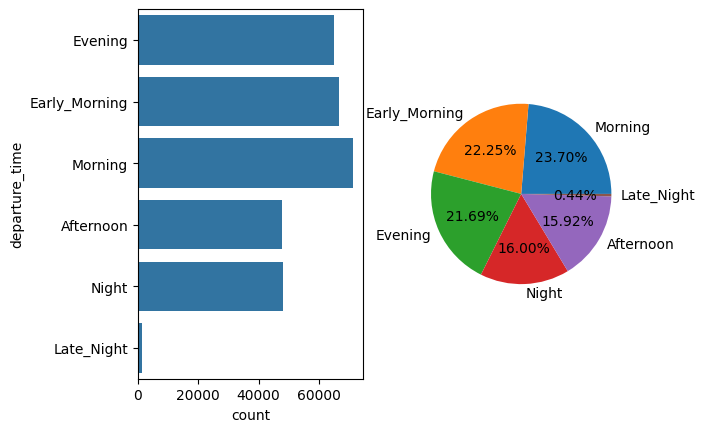

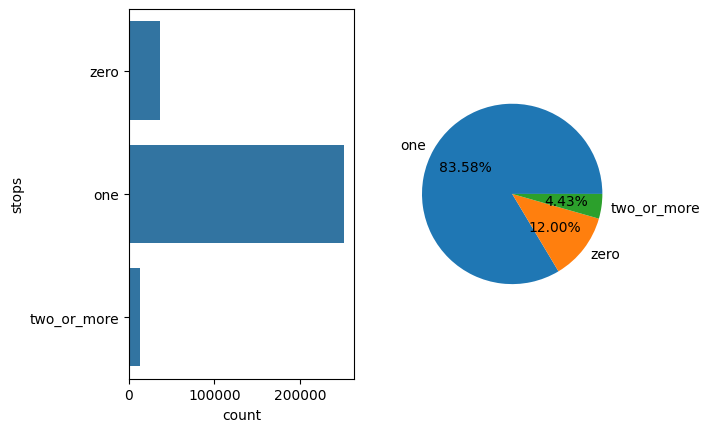

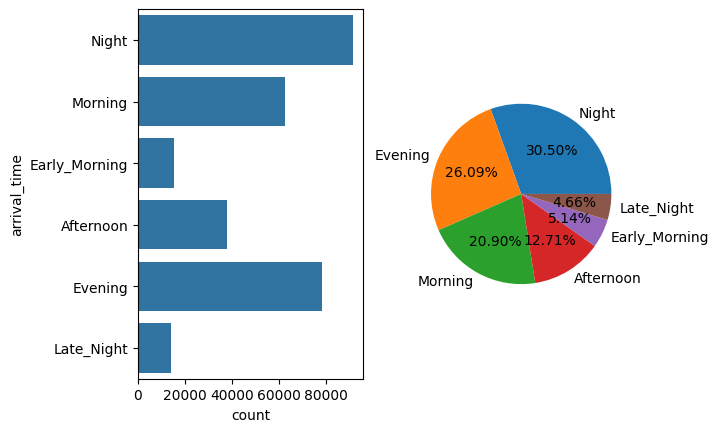

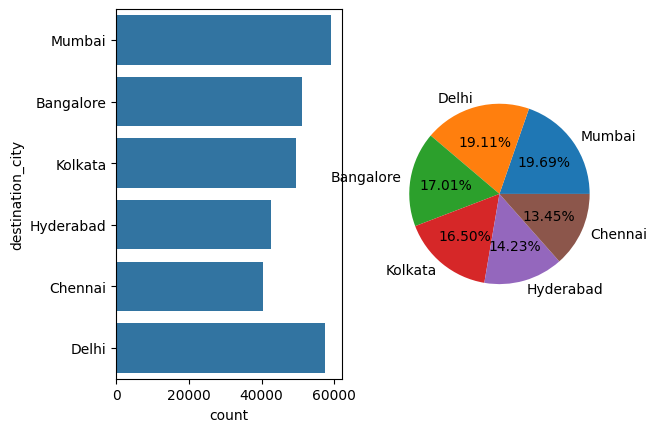

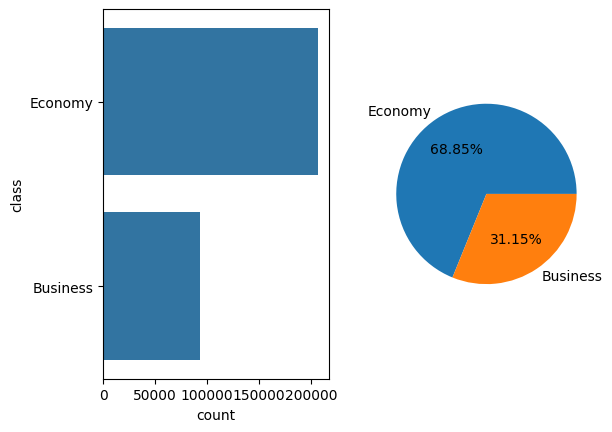

In [125]:
for c in categorical_data:
    plt.subplot(1,2,1)
    sns.countplot(data=categorical_data , y=c)

    plt.subplot(1,2,2)
    val = categorical_data[c].value_counts()
    plt.pie(val.values,labels=val.index,autopct='%1.2f%%')

    plt.show()

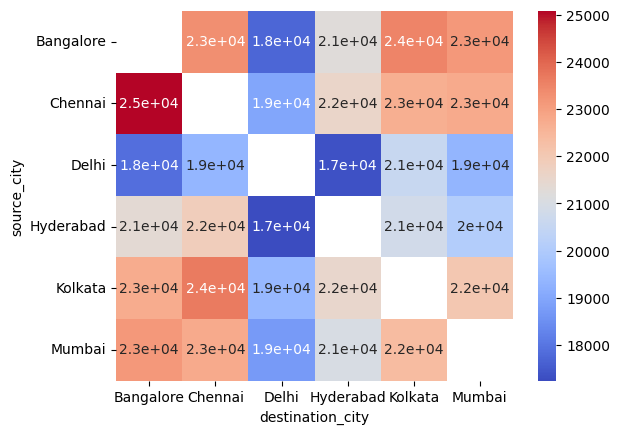

In [135]:
crosstab = df.pivot_table(index='source_city',columns='destination_city',values='price',aggfunc='mean')
sns.heatmap(data=crosstab,annot=True,cmap='coolwarm')
plt.show()

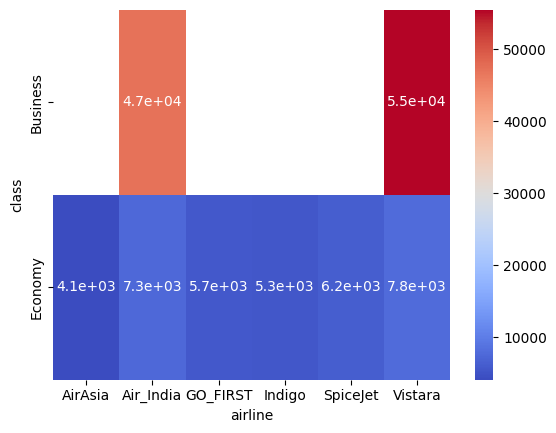

In [136]:
crosstab = crosstab = df.pivot_table(index='class',columns='airline',values='price',aggfunc='mean')
sns.heatmap(data=crosstab,annot=True,cmap='coolwarm')
plt.show()


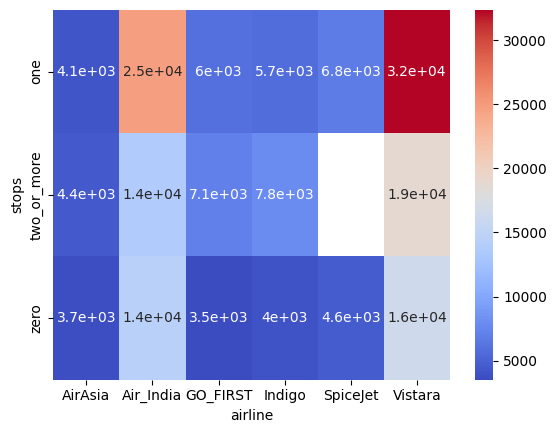

In [137]:
crosstab = crosstab = df.pivot_table(index='stops',columns='airline',values='price',aggfunc='mean')
sns.heatmap(data=crosstab,annot=True,cmap='coolwarm')
plt.show()

#### Encoding

In [82]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

nominal = categorical_data.drop(columns=['stops','class']).columns
ordinal = ['stops','class']

# Ordinal
stops_order = ["zero", "one", "two_or_more"]
class_order = ["Economy", "Business"]

encoder_ord = OrdinalEncoder(categories=[stops_order,class_order])
df_encoded = encoder_ord.fit_transform(df[ordinal])
df[ordinal] = df_encoded 

# Nominal
encoder_nom = OneHotEncoder(drop='first')
one_hot_array = encoder_nom.fit_transform(df[nominal]).toarray()

one_hot_df = pd.DataFrame(one_hot_array, columns=encoder_nom.get_feature_names_out(),index=df.index)

df = df.drop(columns=nominal).join(one_hot_df)

In [83]:
df

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0.0,0.0,2.17,1,5953,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,2.33,1,5953,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,2.17,1,5956,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,2.25,1,5955,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,2.33,1,5955,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1.0,1.0,10.08,49,69265,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300149,1.0,1.0,10.42,49,77105,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
300150,1.0,1.0,13.83,49,79099,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
300151,1.0,1.0,10.00,49,81585,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Splitting

In [84]:
X_org = df.drop(columns='price')
y = np.log1p(df['price']) # log transform for target value y due to presence of outliers

X_train,X_test,y_train,y_test = train_test_split(X_org,y,test_size=0.3,random_state=42)

print('Shapes:')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Shapes:
X_train: (210107, 29)
y_train: (210107,)
X_test: (90046, 29)
y_test: (90046,)


### scaling

In [85]:
from sklearn.preprocessing import StandardScaler,RobustScaler

skewed_columns = ['duration'] # removed price 
normal_columns = ['days_left']

X_train[skewed_columns] = np.log1p(X_train[skewed_columns])
X_test[skewed_columns] = np.log1p(X_test[skewed_columns])

norm_scaler = StandardScaler()
X_train[normal_columns] = norm_scaler.fit_transform(X_train[normal_columns])
X_test[normal_columns] = norm_scaler.transform(X_test[normal_columns])
X_train.head()

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
2406,1.0,0.0,2.668616,-0.886605,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
275865,1.0,1.0,2.358965,-0.223290,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
297156,1.0,1.0,2.498974,0.218920,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12826,1.0,0.0,1.805005,-0.739202,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93166,1.0,0.0,2.608598,1.398146,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Modeling and Testing

In [86]:
model = LinearRegression()
model.fit(X=X_train,y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
y_train_hat = model.predict(X=X_train)
y_test_hat = model.predict(X=X_test)

In [88]:
# Reversing the transform for better understanding of data in evaluation part
y_train_scaled = np.expm1(y_train)
y_test_scaled = np.expm1(y_test)
y_train_hat = np.expm1(y_train_hat)
y_test_hat = np.expm1(y_test_hat)

In [89]:
# Evaluation 
from sklearn.metrics import explained_variance_score # not affected by outliers as it uses median
print('TRAIN')
print(f'MAE: {mean_absolute_error(y_train_scaled,y_train_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_train_scaled,y_train_hat)}')
print(f'MSE: {mean_squared_error(y_train_scaled,y_train_hat)}')
print(f'RMSE: {root_mean_squared_error(y_train_scaled,y_train_hat)}')
print(f'R^2: {r2_score(y_train_scaled,y_train_hat)}')
print('-'*25)
print('TEST')
print(f'MAE: {mean_absolute_error(y_test_scaled,y_test_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_scaled,y_test_hat)}')
print(f'MSE: {mean_squared_error(y_test_scaled,y_test_hat)}')
print(f'RMSE: {root_mean_squared_error(y_test_scaled,y_test_hat)}')
print(f'R^2: {r2_score(y_test_scaled,y_test_hat)}')

TRAIN
MAE: 4609.227631077913
MAPE: 0.2614343265682509
MSE: 61920256.04334582
RMSE: 7868.9424984139905
R^2: 0.8798620983509136
-------------------------
TEST
MAE: 4602.243578135376
MAPE: 0.26052893758317275
MSE: 62110163.253622174
RMSE: 7881.000142978185
R^2: 0.8793195923083186


testing different linear models to try and get better results

In [90]:
from sklearn.linear_model import Lasso,Ridge
model_l1 = Lasso(alpha= 0.1)
model_l1.fit(X_train,y_train)

y_train_l1_hat = model_l1.predict(X=X_train)
y_test_l1_hat = model_l1.predict(X=X_test)

# Reversing the transform for better understanding of data in evaluation part
y_train_hat = np.expm1(y_train_l1_hat)
y_test_hat = np.expm1(y_test_l1_hat)

print('TRAIN')
print(f'MAE: {mean_absolute_error(y_train_scaled,y_train_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_train_scaled,y_train_hat)}')
print(f'MSE: {mean_squared_error(y_train_scaled,y_train_hat)}')
print(f'RMSE: {root_mean_squared_error(y_train_scaled,y_train_hat)}')
print(f'R^2: {r2_score(y_train_scaled,y_train_hat)}')
print('-'*25)
print('TEST')
print(f'MAE: {mean_absolute_error(y_test_scaled,y_test_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_scaled,y_test_hat)}')
print(f'MSE: {mean_squared_error(y_test_scaled,y_test_hat)}')
print(f'RMSE: {root_mean_squared_error(y_test_scaled,y_test_hat)}')
print(f'R^2: {r2_score(y_test_scaled,y_test_hat)}')

TRAIN
MAE: 6893.373467444634
MAPE: 0.41312672602313394
MSE: 131159771.92619105
RMSE: 11452.500684400375
R^2: 0.7455233426529301
-------------------------
TEST
MAE: 6843.880468729369
MAPE: 0.41323059128266304
MSE: 129745690.56311756
RMSE: 11390.596585039677
R^2: 0.7479033701866395


performed worse than normal model

In [91]:
model_l2 = Ridge(alpha= 0.1,solver='saga',max_iter=50000)
model_l2.fit(X_train,y_train)

y_train_l2_hat = model_l2.predict(X=X_train)
y_test_l2_hat = model_l2.predict(X=X_test)

# Reversing the transform for better understanding of data in evaluation part
y_train_hat = np.expm1(y_train_l2_hat)
y_test_hat = np.expm1(y_test_l2_hat)

print('TRAIN')
print(f'MAE: {mean_absolute_error(y_train_scaled,y_train_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_train_scaled,y_train_hat)}')
print(f'MSE: {mean_squared_error(y_train_scaled,y_train_hat)}')
print(f'RMSE: {root_mean_squared_error(y_train_scaled,y_train_hat)}')
print(f'R^2: {r2_score(y_train_scaled,y_train_hat)}')
print('-'*25)
print('TEST')
print(f'MAE: {mean_absolute_error(y_test_scaled,y_test_hat)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_scaled,y_test_hat)}')
print(f'MSE: {mean_squared_error(y_test_scaled,y_test_hat)}')
print(f'RMSE: {root_mean_squared_error(y_test_scaled,y_test_hat)}')
print(f'R^2: {r2_score(y_test_scaled,y_test_hat)}')

TRAIN
MAE: 4608.999374397231
MAPE: 0.2614327745942931
MSE: 61912127.753078565
RMSE: 7868.426002262369
R^2: 0.8798778688886842
-------------------------
TEST
MAE: 4602.012430883736
MAPE: 0.26052743509943005
MSE: 62101952.65531361
RMSE: 7880.4792148265715
R^2: 0.8793355455484868


performed similar to normal linear regression

over all conclusion:
- The model is underfitting and does not work best for small price values, however the the log transformation for y_values helped improve MAPE abit

### Saving the Model

In [ ]:
from joblib import dump

# Saving the normal LinearRegression model as it's the best performing one
dump(model,'flight_regression_linear_model.joblib')

['flight_regression_linear_model.joblib']